In [1]:
import pandas as pd
meta = pd.read_csv('data/pub_filter.csv')
rel = pd.read_csv('data/pub_relation.csv')
pub = pd.read_csv('data/dist_pub.csv')
per = pd.read_csv('data/dist_per.csv')

Reorganise the country

In [2]:
location = pd.read_csv('sna/data/location.csv')

In [3]:
location.head()

,Name,ID,[Birth Place] Location Reference,Birth Place,[Birth Place] Geometry,Birth Geometry,[Death Place] Location Reference,Death Place,[Death Place] Geometry,Death Geometry
0,Elizabeth Cary,120367,London (GB),London,"{""type"": ""Point"", ""coordinates"": [-0.12574001,...","-0.12574001, 51.50852966",London (GB),London,"{""type"": ""Point"", ""coordinates"": [-0.12574001,...","-0.12574001, 51.50852966"
1,George Cotton,120527,NaN,NaN,NaN,NaN,London (GB),London,"{""type"": ""Point"", ""coordinates"": [-0.12574001,...","-0.12574001, 51.50852966"
2,Edward Knott,120402,Morpeth (GB),Morpeth,"{""type"": ""Point"", ""coordinates"": [-1.69120002,...","-1.69120002, 55.16764831999999",London (GB),London,"{""type"": ""Point"", ""coordinates"": [-0.12574001,...","-0.12574001, 51.50852966"
3,Anthony Champney,120325,Cawthorne (GB),Cawthorne,"{""type"": ""Point"", ""coordinates"": [-1.58333004,...","-1.58333004, 53.56666946",London (GB),London,"{""type"": ""Point"", ""coordinates"": [-0.12574001,...","-0.12574001, 51.50852966"
4,Edward Catcher,120324,London (GB),London,"{""type"": ""Point"", ""coordinates"": [-0.12574001,...","-0.12574001, 51.50852966",London (GB),London,"{""type"": ""Point"", ""coordinates"": [-0.12574001,...","-0.12574001, 51.50852966"


In [4]:
location_name = [name for name in location['Birth Place'] if not str(name) == 'nan']
for name in location['Death Place']:
    if not str(name) == 'nan':
        location_name.append(name)
location_name = list(set(location_name))
location_name.sort()

In [5]:
len(location_name)

314

In [6]:
import re

In [7]:
# a dictionary has the match of place and country
place_dict = {}
with open('data/countries.txt', 'rt', encoding = 'utf-8') as infile:
    for line in infile:
        place = re.findall('(.*?)\s\|', line)[0]
        country = re.findall('\|\s(.*)', line)[0]
        place_dict[place] = country

In [8]:
# check if the list is currect
location_name == [place for place in place_dict]

True

In [9]:
# adjust some places that are marked wrong
adjust_list = ['Saint-Pol-sur-Ternoise', 'Ranchicourt', 'Arras', 'Ranchicourt', 'Charleville-Mézières', 'Avesnes-sur-Helpe', 'Béthune, Pecquencourt', 'Sainghin-en-Mélantois', 'Crespin']
for place in place_dict:
    if place in adjust_list:
        place_dict[place] = 'The Spanish Netherlands'

In [10]:
# reorganise the countries
organise_country = {
    'Belgium': 'Low Countries',
    'China': 'China',
    'England': 'Britain',
    'France': 'France',
    'Ireland': 'Britain',
    'Peru': 'Peru',
    'Portugal': 'Iberian Union',
    'Scotland': 'Britain',
    'Spain': 'Iberian Union',
    'Switzerland': 'Genève',
    'The Duchy of Ferrara': 'Italy',
    'The Duchy of Milan': 'Italy',
    'The Duchy of Parma': 'Italy',
    'The Duchy of Savoy': 'Italy',
    'The Dutch Republic': "Low Countries",
    'The Grand Duchy of Tuscany': 'Italy',
    'The Holy Roman Empire': 'Holy Roman Empire',
    'The Kingdom of Naples': 'Italy',
    'The Kingdom of Sicily': 'Italy',
    'The Kingdom of Spain': 'Italy',
    'The Papal States': 'Italy',
    'The Republic of Genoa': 'Italy',
    'The Republic of Venice': 'Italy',
    'The Spanish Empire': 'Iberian Union',
    'The Spanish Netherlands': 'Low Countries',
    'Wales': 'Britain'
}

In [11]:
list(set([organise_country[country] for country in organise_country]))

['France',
 'Peru',
 'Genève',
 'Britain',
 'Holy Roman Empire',
 'Iberian Union',
 'Low Countries',
 'Italy',
 'China']

In [12]:
correct_birth = []
for place in location['Birth Place']:
    if not str(place) == 'nan':
        correct_birth.append(organise_country[place_dict[place]])
    else:
        correct_birth.append(None)
location['Correct Birth Country'] = correct_birth

In [13]:
correct_death = []
for place in location['Death Place']:
    if not str(place) == 'nan':
        correct_death.append(organise_country[place_dict[place]])
    else:
        correct_death.append(None)
location['Correct Death Country'] = correct_death

In [14]:
location = location[['ID', 'Correct Birth Country', 'Correct Death Country']].rename(columns = {'ID': 'ODIS_PERS_ID'})

In [15]:
per_adjust = pd.merge(per.iloc[:, 0:39], location, on = 'ODIS_PERS_ID')

In [16]:
per_adjust.shape

(2081, 41)

In [19]:
# create place dictionary
place_region = {}
for i in range(0, len(per)):
    if not per['Birth Place'][i] in place_region:
        place_region[per['Birth Place'][i]] = per['Birth Region'][i]
for i in range(0, len(per)):
    if not per['Death Place'][i] in place_region:
        place_region[per['Death Place'][i]] = per['Death Region'][i]

Distribution of Birth Region

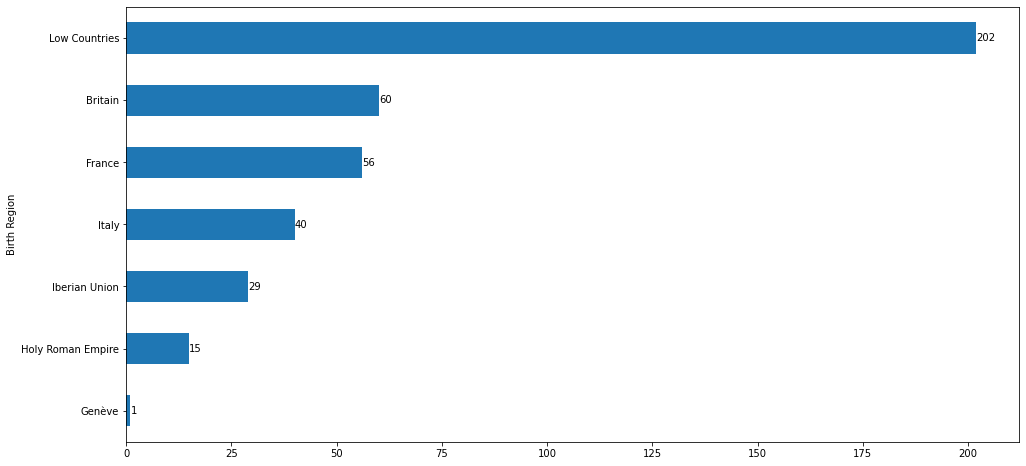

In [20]:
# count of birth region
birth_region_plot = per['Birth Region'].value_counts().sort_values().plot.barh(figsize = (16, 8))

for container in birth_region_plot.containers:
    birth_region_plot.bar_label(container)

In [21]:
# count and % table of birth region
birth_region_table = pd.DataFrame()
region_name = list(set([region for region in per['Birth Region'] if not str(region) == 'nan']))
region_name.sort()
birth_region_table['Region'] = region_name

birth_region_count = [count for count in per['Birth Region'].value_counts().sort_index(ascending = True)]
birth_region_table['Count'] = birth_region_count

birth_region_pro = [round((count / sum(per['Birth Region'].value_counts())) * 100, 2) for count in birth_region_count]
birth_region_table['%'] = birth_region_pro

birth_region_table.sort_values(by = 'Count', ascending = False)

,Region,Count,%
6,Low Countries,202,50.12
0,Britain,60,14.89
1,France,56,13.90
5,Italy,40,9.93
4,Iberian Union,29,7.20
3,Holy Roman Empire,15,3.72
2,Genève,1,0.25


Distribution of Death Region

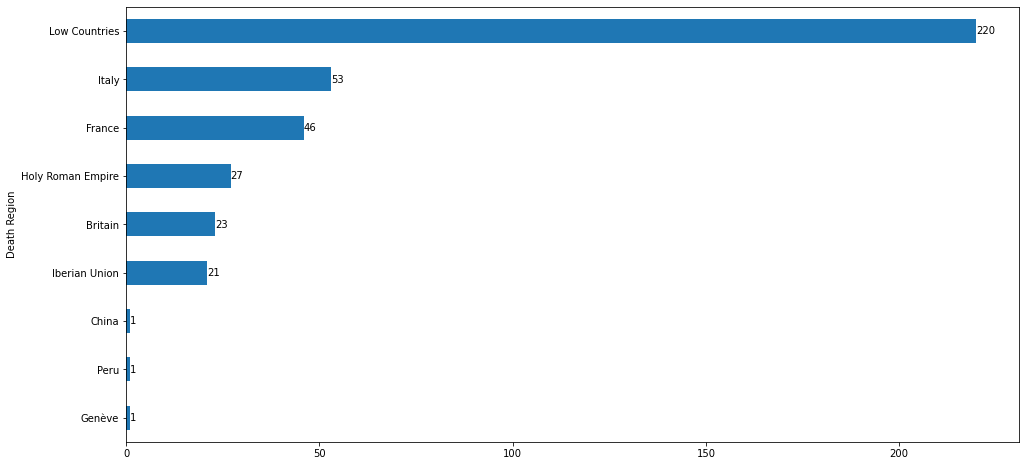

In [22]:
# count of death region
death_region_plot = per['Death Region'].value_counts().sort_values().plot.barh(figsize = (16, 8))

for container in death_region_plot.containers:
    death_region_plot.bar_label(container)

In [23]:
# count and % table of death region
death_region_table = pd.DataFrame()
region_name = list(set([region for region in per['Death Region'] if not str(region) == 'nan']))
region_name.sort()
death_region_table['Region'] = region_name

death_region_count = [count for count in per['Death Region'].value_counts().sort_index(ascending = True)]
death_region_table['Count'] = death_region_count

death_region_pro = [round((count / sum(per['Death Region'].value_counts())) * 100, 2) for count in death_region_count]
death_region_table['%'] = death_region_pro

death_region_table.sort_values(by = 'Count', ascending = False)

,Region,Count,%
7,Low Countries,220,55.98
6,Italy,53,13.49
2,France,46,11.70
4,Holy Roman Empire,27,6.87
0,Britain,23,5.85
5,Iberian Union,21,5.34
1,China,1,0.25
3,Genève,1,0.25
8,Peru,1,0.25


In [24]:
region_graph = pd.merge(birth_region_table, death_region_table, on = 'Region', how = 'right')
region_graph = region_graph.rename(columns = {'Count_x': 'Birth Count', 'Count_y': 'Death Count'})
region_graph = region_graph[['Region', 'Birth Count', 'Death Count']]
region_graph = region_graph.set_index('Region')
region_graph = region_graph.fillna(0).sort_values('Birth Count', ascending = False)

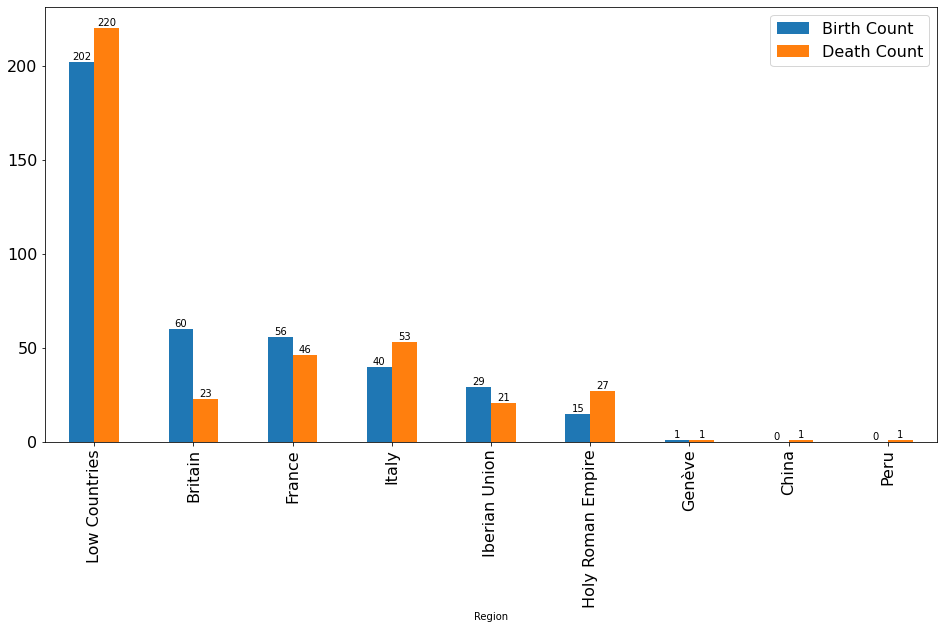

In [25]:
region_graph_plot = region_graph.plot.bar(figsize = (16, 8))
region_graph_plot.tick_params(axis='x', labelsize = 16)
region_graph_plot.tick_params(axis='y', labelsize = 16)
region_graph_plot.legend(fontsize = 16)

for container in region_graph_plot.containers:
    region_graph_plot.bar_label(container)

Node (mentioned places)

In [26]:
places = list(set([place for place in per['Birth Place'] if not str(place) == 'nan']))
for place in per['Death Place']:
    if not place in places:
        if not str(place) == 'nan':
            places.append(place)
places.sort()

In [27]:
len(places)

331

In [28]:
node_place = list(set([place for place in per['Birth Place'] if not str(place) == 'nan']))
for place in per['Death Place']:
    if not place in node_place:
        if not str(place) == 'nan':
            node_place.append(place)
node_place.sort()

In [29]:
node_region = list(set([region for region in per['Birth Region'] if not str(region) == 'nan']))
for region in per['Death Region']:
    if not region in node_region:
        if not str(region) == 'nan':
            node_region.append(region)
node_region.sort()

Edge (connection of places)

In [30]:
edge_count = 0
for i in range(0, len(per)):
    if str(per['Birth Place'][i]) != 'nan' and str(per['Death Place'][i]) != 'nan':
        edge_count += 1
edge_count

333

In [31]:
edge_place = [
        (per['Birth Place'][i], per['Death Place'][i])
        for i in range(0, len(per)) if str(per['Birth Place'][i]) != 'nan' or str(per['Death Place'][i]) != 'nan'
    ]

In [32]:
edge_region = [
        (per['Birth Region'][i], per['Death Region'][i])
        for i in range(0, len(per)) if str(per['Birth Region'][i]) != 'nan' or str(per['Death Region'][i]) != 'nan'
    ]

In [33]:
def list_check(items, place):
    for item in items:
        if not str(item) in ['nan', place]:
            return False
    return True

In [34]:
# number nodes that do not have edge
alone_node = []

birth_places = list(set([place for place in per['Birth Place'] if not str(place) == 'nan']))
for place in birth_places:
    temp_df = per.loc[per['Birth Place'] == place]
    if list_check([item for item in temp_df['Death Place']], place) == True:
        alone_node.append(place)

death_places = list(set([place for place in per['Death Place'] if not str(place) == 'nan']))
for place in death_places:
    temp_df = per.loc[per['Death Place'] == place]
    if list_check([item for item in temp_df['Birth Place']], place) == True:
        alone_node.append(place)

alone_node = list(set(alone_node))
alone_node.sort()
len(alone_node)

64

Build the network

In [35]:
import networkx as nx

In [36]:
# the place network
G_place = nx.DiGraph()
G_place.add_nodes_from(node_place)
G_place_keys = G_place.add_edges_from(edge_place)

In [37]:
place_degree = pd.DataFrame()
place_degree_place = [item[0] for item in G_place.degree() if not str(item[0]) == 'nan']
place_degree_degree = [item[1] for item in G_place.degree() if not str(item[0]) == 'nan']
place_degree_region = [place_region[item[0]] for item in G_place.degree() if not str(item[0]) == 'nan']
place_degree['Place'] = place_degree_place
place_degree['Degree'] = place_degree_degree
place_degree['Region'] = place_degree_region
place_degree.sort_values(by = 'Degree', ascending = False).head(10)

,Place,Degree,Region
97,Douai,45,Low Countries
248,Roma,25,Italy
162,Leuven,20,Low Countries
165,Lille,19,Low Countries
295,Tournai,19,Low Countries
226,Paris,19,France
19,Arras,18,Low Countries
56,Brussel,16,Low Countries
15,Antwerpen,15,Low Countries
174,London,14,Britain


In [38]:
place_degree.groupby('Region')['Degree'].sum().sort_values(ascending = False)

Region
Low Countries        334
France               100
Italy                 89
Britain               78
Iberian Union         50
Holy Roman Empire     42
Genève                 2
China                  1
Peru                   1
Name: Degree, dtype: int64

In [39]:
place_in = pd.DataFrame()
place_in_place = [item[0] for item in G_place.in_degree() if not str(item[0]) == 'nan']
place_in_degree = [item[1] for item in G_place.in_degree() if not str(item[0]) == 'nan']
place_in_region = [place_region[item[0]] for item in G_place.in_degree() if not str(item[0]) == 'nan']
place_in['Place'] = place_in_place
place_in['InDegree'] = place_in_degree
place_in['Region'] = place_in_region
place_in.sort_values(by = 'InDegree', ascending = False).head(10)

,Place,InDegree,Region
97,Douai,37,Low Countries
248,Roma,24,Italy
162,Leuven,16,Low Countries
226,Paris,15,France
295,Tournai,14,Low Countries
56,Brussel,12,Low Countries
174,London,12,Britain
19,Arras,12,Low Countries
165,Lille,11,Low Countries
62,Cambrai,7,Low Countries


In [40]:
place_in.groupby('Region')['InDegree'].sum().sort_values(ascending = False)

Region
Low Countries        172
Italy                 49
France                45
Holy Roman Empire     27
Britain               21
Iberian Union         21
China                  1
Genève                 1
Peru                   1
Name: InDegree, dtype: int64

In [41]:
place_in.groupby('Region')['InDegree'].mean().round(2).sort_values(ascending = False)

Region
Low Countries        1.61
Italy                1.07
China                1.00
Holy Roman Empire    1.00
Peru                 1.00
France               0.75
Iberian Union        0.72
Genève               0.50
Britain              0.36
Name: InDegree, dtype: float64

In [42]:
place_out = pd.DataFrame()
place_out_place = [item[0] for item in G_place.out_degree() if not str(item[0]) == 'nan']
place_out_degree = [item[1] for item in G_place.out_degree() if not str(item[0]) == 'nan']
place_out_region = [place_region[item[0]] for item in G_place.out_degree() if not str(item[0]) == 'nan']
place_out['Place'] = place_out_place
place_out['OutDegree'] = place_out_degree
place_out['Region'] = place_out_region
place_out.sort_values(by = 'OutDegree', ascending = False).head(10)

,Place,OutDegree,Region
15,Antwerpen,9,Low Countries
165,Lille,8,Low Countries
97,Douai,8,Low Countries
19,Arras,6,Low Countries
306,Valenciennes,5,Low Countries
171,Liège,5,Low Countries
295,Tournai,5,Low Countries
56,Brussel,4,Low Countries
162,Leuven,4,Low Countries
120,Gent,4,Low Countries


In [43]:
place_out.groupby('Region')['OutDegree'].mean().round(2).sort_values(ascending = False)

Region
Low Countries        1.51
Iberian Union        1.00
Britain              0.98
France               0.92
Italy                0.87
Holy Roman Empire    0.56
Genève               0.50
China                0.00
Peru                 0.00
Name: OutDegree, dtype: float64

In [44]:
place_out.groupby('Region')['OutDegree'].sum().sort_values(ascending = False)

Region
Low Countries        162
Britain               57
France                55
Italy                 40
Iberian Union         29
Holy Roman Empire     15
Genève                 1
China                  0
Peru                   0
Name: OutDegree, dtype: int64

In [45]:
from scipy.stats import ttest_ind

In [46]:
regions = list(set([region for region in place_in['Region']]))
regions.sort()

In [47]:
for region in regions:
    in_df = place_in.loc[place_in['Region'] == region]
    out_df = place_out.loc[place_out['Region'] == region]
    test1 = [i for i in in_df['InDegree']]
    test2 = [i for i in out_df['OutDegree']]
    t_statistic, p_value = ttest_ind(test1, test2)
    if p_value < 0.05:
        print(region, t_statistic, p_value)

Britain -2.783571330466238 0.006295606245368684


C:\Users\User\AppData\Local\Temp\ipykernel_18512\2376656406.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = ttest_ind(test1, test2)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


Role X Region

In [48]:
from statsmodels.stats.proportion import proportions_ztest

In [49]:
role_region = pd.merge(rel[['ODIS_PERS_ID', 'Relation Cluster']], per[['ODIS_PERS_ID', 'Birth Region', 'Death Region']], on = 'ODIS_PERS_ID')

In [50]:
role_region.shape

(8404, 4)

In [51]:
def normalise(import_df):
    df = import_df.copy()
    for col in df.columns:
        col_sum = sum([num for num in df[col] if not pd.isnull(num)])
        col_list = []
        for num in df[col]:
            if not pd.isnull(num):
                col_list.append(num / col_sum)
            else:
                col_list.append(num)
        df[col] = col_list
    return df

In [52]:
def ztesting(df, df2):
    
    total_list = []
    for column in df.columns:
        total_list.append(sum([count for count in df[column] if not str(count) == 'nan']))
    
    df_new = df.copy()
    
    for i in range(0, len(df.columns)):
        result_list = []
        
        for row in range(0, len(df)):
            result_set = []
            
            if str(df[df.columns[i]][row]) == 'nan':
                result_list.append(None)
            else:
                for j in range(0, len(df.columns)):
                    if not i == j:
                        if str(df[df.columns[j]][row]) == 'nan':
                            result_set.append('n')
                        else:
                            z_score, p_value = proportions_ztest(
                                    [df[df.columns[i]][row], df[df.columns[j]][row]], [total_list[i], total_list[j]]
                                )
                            if p_value < 0.05:
                                if max([df2[df2.columns[i]][row], df2[df2.columns[j]][row]]) == df2[df2.columns[i]][row]:
                                    result_set.append(j)
                                else:
                                    result_set.append('')
                            else:
                                result_set.append('')

                result_list.append(result_set)
        
        df_new[df.columns[i]] = result_list
    
    return df_new

In [53]:
def insert_all(df):
    
    all_list = []
    for i in range(0, len(df)):
        all_list.append(sum([count for count in df.iloc[i] if not str(count) == 'nan']))
    df.insert(0, 'All', all_list)
    
    return df

In [54]:
role_region_birth = role_region.groupby(['Relation Cluster', 'Birth Region']).size().unstack()
role_region_birth = insert_all(role_region_birth)

In [55]:
role_region_birth

Birth Region,All,Britain,France,Genève,Holy Roman Empire,Iberian Union,Italy,Low Countries
Relation Cluster,,,,,,,,
approbator,341.0,44.0,8.0,NaN,NaN,NaN,NaN,289.0
archbishop/bishop,5.0,NaN,1.0,NaN,NaN,NaN,NaN,4.0
author,1228.0,139.0,116.0,NaN,86.0,185.0,116.0,586.0
collaborator/contributor/signer,41.0,6.0,2.0,NaN,2.0,4.0,2.0,25.0
commentator/eulogist,109.0,4.0,6.0,NaN,NaN,NaN,NaN,99.0
compiler/editor/revisor,170.0,29.0,16.0,NaN,1.0,1.0,13.0,110.0
dedicatee,132.0,2.0,9.0,NaN,14.0,18.0,5.0,84.0
engraver/etcher/illustrator,17.0,NaN,NaN,NaN,NaN,NaN,NaN,17.0
heirs/widow,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [56]:
role_region_birth_pro = normalise(role_region_birth)

In [57]:
role_region_birth_pro.round(2)

Birth Region,All,Britain,France,Genève,Holy Roman Empire,Iberian Union,Italy,Low Countries
Relation Cluster,,,,,,,,
approbator,0.09,0.14,0.03,NaN,NaN,NaN,NaN,0.10
archbishop/bishop,0.00,NaN,0.00,NaN,NaN,NaN,NaN,0.00
author,0.32,0.45,0.47,NaN,0.83,0.89,0.84,0.21
collaborator/contributor/signer,0.01,0.02,0.01,NaN,0.02,0.02,0.01,0.01
commentator/eulogist,0.03,0.01,0.02,NaN,NaN,NaN,NaN,0.04
compiler/editor/revisor,0.04,0.09,0.06,NaN,0.01,0.00,0.09,0.04
dedicatee,0.03,0.01,0.04,NaN,0.14,0.09,0.04,0.03
engraver/etcher/illustrator,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
heirs/widow,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [58]:
ztesting(role_region_birth, role_region_birth_pro)

Birth Region,All,Britain,France,Genève,Holy Roman Empire,Iberian Union,Italy,Low Countries
Relation Cluster,,,,,,,,
approbator,"[, 2, n, n, n, n, ]","[0, 2, n, n, n, n, 7]","[, , n, n, n, n, ]",None,None,None,None,"[, , 2, n, n, n, n]"
archbishop/bishop,"[n, , n, n, n, n, ]",None,"[, n, n, n, n, n, ]",None,None,None,None,"[, n, , n, n, n, n]"
author,"[, , n, , , , 7]","[0, , n, , , , 7]","[0, , n, , , , 7]",None,"[0, 1, 2, n, , , 7]","[0, 1, 2, n, , , 7]","[0, 1, 2, n, , , 7]","[, , , n, , , ]"
collaborator/contributor/signer,"[, , n, , , , ]","[, , n, , , , ]","[, , n, , , , ]",None,"[, , , n, , , ]","[, , , n, , , ]","[, , , n, , , ]","[, , , n, , , ]"
commentator/eulogist,"[, , n, n, n, n, ]","[, , n, n, n, n, ]","[, , n, n, n, n, ]",None,None,None,None,"[, 1, , n, n, n, n]"
compiler/editor/revisor,"[, , n, , 5, , ]","[0, , n, 4, 5, , 7]","[, , n, 4, 5, , ]",None,"[, , , n, , , ]","[, , , n, , , ]","[0, , , n, 4, 5, 7]","[, , , n, , 5, ]"
dedicatee,"[1, , n, , , , ]","[, , n, , , , ]","[, 1, n, , , , ]",None,"[0, 1, 2, n, , 6, 7]","[0, 1, 2, n, , , 7]","[, 1, , n, , , ]","[, 1, , n, , , ]"
engraver/etcher/illustrator,"[n, n, n, n, n, n, ]",None,None,None,None,None,None,"[, n, n, n, n, n, n]"
heirs/widow,"[n, n, n, n, n, n, ]",None,None,None,None,None,None,"[, n, n, n, n, n, n]"


<AxesSubplot:xlabel='Birth Region'>

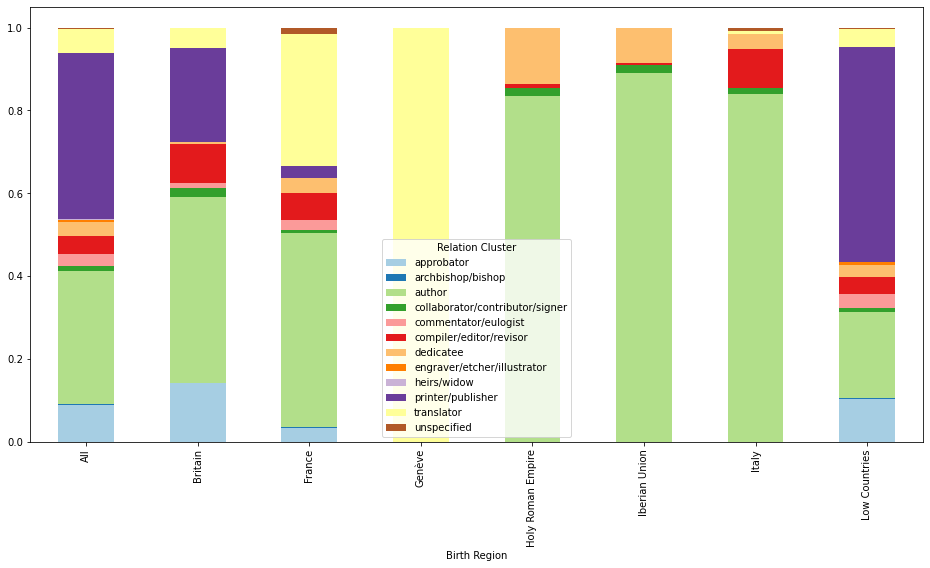

In [59]:
role_region_birth_pro.T.plot.bar(stacked = True, figsize=(16, 8), colormap = 'Paired')

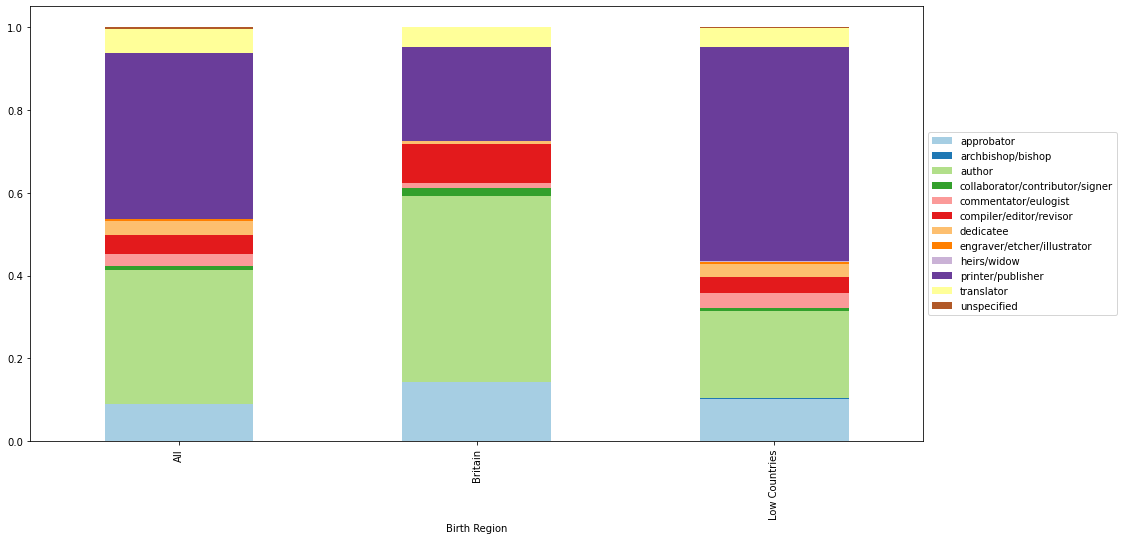

In [60]:
role_region_birth_pro[['All', 'Britain', 'Low Countries']].T.plot.bar(stacked = True, figsize=(16, 8), colormap = 'Paired').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [61]:
n_list = []
for col in role_region_birth.columns:
    n_list.append(sum([i for i in role_region_birth[col] if not str(i) == 'nan']))
n_list

[3809.0, 309.0, 248.0, 1.0, 103.0, 208.0, 138.0, 2802.0]

In [62]:
proportions_ztest([139, 1228], [309, 3809])

(4.575275564864964, 4.755935707682728e-06)

In [63]:
proportions_ztest([29, 170], [309, 3809])

(3.8802106243896253, 0.00010436604785465154)

In [64]:
proportions_ztest([1450, 1527], [2802, 3809])

(9.416093328417935, 4.6818412898448016e-21)

In [65]:
role_region_death = role_region.groupby(['Relation Cluster', 'Death Region']).size().unstack()
role_region_death = insert_all(role_region_death)

In [66]:
role_region_death_pro = normalise(role_region_death)

In [67]:
role_region_death_pro.round(2)

Death Region,All,Britain,China,France,Genève,Holy Roman Empire,Iberian Union,Italy,Low Countries,Peru
Relation Cluster,,,,,,,,,,
approbator,0.09,0.19,NaN,NaN,NaN,0.01,NaN,NaN,0.10,NaN
archbishop/bishop,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
author,0.28,0.51,1.0,0.57,1.0,0.93,0.93,0.85,0.16,1.0
collaborator/contributor/signer,0.01,0.02,NaN,0.01,NaN,0.01,0.01,0.01,0.01,NaN
commentator/eulogist,0.02,NaN,NaN,0.03,NaN,NaN,NaN,0.00,0.03,NaN
compiler/editor/revisor,0.05,0.19,NaN,0.06,NaN,0.01,0.01,0.09,0.04,NaN
dedicatee,0.03,NaN,NaN,0.03,NaN,0.03,0.05,0.02,0.03,NaN
engraver/etcher/illustrator,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN
heirs/widow,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN


<AxesSubplot:xlabel='Death Region'>

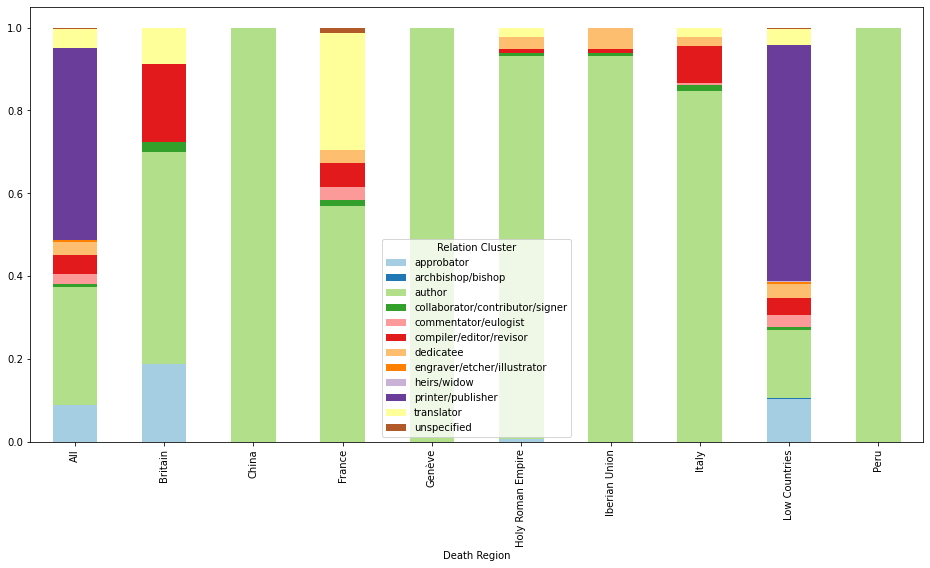

In [68]:
role_region_death_pro.T.plot.bar(stacked = True, figsize=(16, 8), colormap = 'Paired')

In [69]:
ztesting(role_region_death, role_region_death_pro)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:790: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


Death Region,All,Britain,China,France,Genève,Holy Roman Empire,Iberian Union,Italy,Low Countries,Peru
Relation Cluster,,,,,,,,,,
approbator,"[, n, n, n, 5, n, n, , n]","[0, n, n, n, 5, n, n, 8, n]",None,None,None,"[, , n, n, n, n, n, , n]",None,None,"[0, , n, n, n, 5, n, n, n]",None
archbishop/bishop,"[n, n, n, n, n, n, n, , n]",None,None,None,None,None,None,None,"[, n, n, n, n, n, n, n, n]",None
author,"[, , , , , , , 8, ]","[0, , , , , , , 8, ]","[0, , , , , , , 8, ]","[0, , , , , , , 8, ]","[0, 1, , 3, , , , 8, ]","[0, 1, , 3, , , 7, 8, ]","[0, 1, , 3, , , 7, 8, ]","[0, 1, , 3, , , , 8, ]","[, , , , , , , , ]","[, , , , , , , , 8]"
collaborator/contributor/signer,"[, n, , n, , , , , n]","[, n, , n, , , , , n]",None,"[, , n, n, , , , , n]",None,"[, , n, , n, , , , n]","[, , n, , n, , , , n]","[, , n, , n, , , , n]","[, , n, , n, , , , n]",None
commentator/eulogist,"[n, n, , n, n, n, , , n]",None,None,"[, n, n, n, n, n, 7, , n]",None,None,None,"[, n, n, , n, n, n, , n]","[, n, n, , n, n, n, 7, n]",None
compiler/editor/revisor,"[, n, , n, 5, 6, , , n]","[0, n, 3, n, 5, 6, 7, 8, n]",None,"[, , n, n, 5, 6, , , n]",None,"[, , n, , n, , , , n]","[, , n, , n, , , , n]","[0, , n, , n, 5, 6, 8, n]","[, , n, , n, 5, 6, , n]",None
dedicatee,"[n, n, , n, , , , , n]",None,None,"[, n, n, n, , , , , n]",None,"[, n, n, , n, , , , n]","[, n, n, , n, , , , n]","[, n, n, , n, , , , n]","[, n, n, , n, , , , n]",None
engraver/etcher/illustrator,"[n, n, n, n, n, n, n, , n]",None,None,None,None,None,None,None,"[, n, n, n, n, n, n, n, n]",None
heirs/widow,"[n, n, n, n, n, n, n, , n]",None,None,None,None,None,None,None,"[, n, n, n, n, n, n, n, n]",None


In [70]:
roles = list(set([r for r in role_region['Relation Cluster']]))
roles.sort()

In [71]:
roles

['approbator',
 'archbishop/bishop',
 'author',
 'collaborator/contributor/signer',
 'commentator/eulogist',
 'compiler/editor/revisor',
 'dedicatee',
 'engraver/etcher/illustrator',
 'heirs/widow',
 'printer/publisher',
 'translator',
 'unspecified']

In [72]:
regions = ['All'] + list(set([region for region in role_region['Birth Region'] if not str(region) == 'nan']))
regions.sort()

In [73]:
regions

['All',
 'Britain',
 'France',
 'Genève',
 'Holy Roman Empire',
 'Iberian Union',
 'Italy',
 'Low Countries']

In [74]:
per.groupby('Birth Region').count()['ODIS_PERS_ID']

Birth Region
Britain               60
France                56
Genève                 1
Holy Roman Empire     15
Iberian Union         29
Italy                 40
Low Countries        202
Name: ODIS_PERS_ID, dtype: int64

In [75]:
sum(per.groupby('Birth Region').count()['ODIS_PERS_ID'])

403

In [76]:
roleXregion_dist = {}
for region in regions:
    roleXregion_dist[region] = {}
    for role in roles:
        if region == 'All':
            temp_df = role_region.loc[(role_region['Relation Cluster'] == role) & (role_region['Birth Region'].notna())]
            roleXregion_dist[region][role] = len(list(set([ID for ID in temp_df['ODIS_PERS_ID']])))
        else:
            temp_df = role_region.loc[(role_region['Birth Region'] == region) & (role_region['Relation Cluster'] == role)]
            roleXregion_dist[region][role] = len(list(set([ID for ID in temp_df['ODIS_PERS_ID']])))

In [77]:
for region in roleXregion_dist:
    role_region_birth[region] = [count for role, count in roleXregion_dist[region].items()]

In [78]:
role_region_birth

Birth Region,All,Britain,France,Genève,Holy Roman Empire,Iberian Union,Italy,Low Countries
Relation Cluster,,,,,,,,
approbator,29,7,3,0,0,0,0,19
archbishop/bishop,4,0,1,0,0,0,0,3
author,283,48,34,0,12,26,37,126
collaborator/contributor/signer,37,6,2,0,2,4,2,21
commentator/eulogist,37,2,4,0,0,0,0,31
compiler/editor/revisor,49,13,5,0,1,1,1,28
dedicatee,51,2,3,0,2,3,3,38
engraver/etcher/illustrator,1,0,0,0,0,0,0,1
heirs/widow,4,0,0,0,0,0,0,4


In [79]:
n_list = [sum(per.groupby('Birth Region').count()['ODIS_PERS_ID'])] + [count for count in per.groupby('Birth Region').count()['ODIS_PERS_ID']]
for i in range(0, len(role_region_birth_pro.columns)):
    temp_list = [count / n_list[i] for count in role_region_birth[role_region_birth_pro.columns[i]]]
    role_region_birth_pro[role_region_birth_pro.columns[i]] = temp_list

In [80]:
role_region_birth_pro.round(2)

Birth Region,All,Britain,France,Genève,Holy Roman Empire,Iberian Union,Italy,Low Countries
Relation Cluster,,,,,,,,
approbator,0.07,0.12,0.05,0.0,0.00,0.00,0.00,0.09
archbishop/bishop,0.01,0.00,0.02,0.0,0.00,0.00,0.00,0.01
author,0.70,0.80,0.61,0.0,0.80,0.90,0.92,0.62
collaborator/contributor/signer,0.09,0.10,0.04,0.0,0.13,0.14,0.05,0.10
commentator/eulogist,0.09,0.03,0.07,0.0,0.00,0.00,0.00,0.15
compiler/editor/revisor,0.12,0.22,0.09,0.0,0.07,0.03,0.02,0.14
dedicatee,0.13,0.03,0.05,0.0,0.13,0.10,0.08,0.19
engraver/etcher/illustrator,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
heirs/widow,0.01,0.00,0.00,0.0,0.00,0.00,0.00,0.02


In [81]:
def ztesting2(df, df2):
    
#     total_list = []
#     for column in df.columns:
#         total_list.append(sum([count for count in df[column] if not str(count) == 'nan']))
    
    df_new = df.copy()
    
    for i in range(0, len(df.columns)):
        result_list = []
        
        for row in range(0, len(df)):
            result_set = []
            
            if str(df[df.columns[i]][row]) == 'nan':
                result_list.append(None)
            else:
                for j in range(0, len(df.columns)):
                    if not i == j:
                        if str(df[df.columns[j]][row]) == 'nan':
                            result_set.append('n')
                        else:
                            z_score, p_value = proportions_ztest(
                                    [df[df.columns[i]][row], df[df.columns[j]][row]], [total_list[i], total_list[j]]
                                )
                            if p_value < 0.05:
                                if max([df2[df2.columns[i]][row], df2[df2.columns[j]][row]]) == df2[df2.columns[i]][row]:
                                    result_set.append(j)
                                else:
                                    result_set.append('')
                            else:
                                result_set.append('')

                result_list.append(result_set)
        
        df_new[df.columns[i]] = result_list
    
    return df_new

In [82]:
total_list = n_list

In [83]:
total_list

[403, 60, 56, 1, 15, 29, 40, 202]

In [84]:
ztesting2(role_region_birth, role_region_birth_pro)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:790: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


Birth Region,All,Britain,France,Genève,Holy Roman Empire,Iberian Union,Italy,Low Countries
Relation Cluster,,,,,,,,
approbator,"[, , , , , , ]","[, , , , , 6, ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , 6]"
archbishop/bishop,"[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]"
author,"[, , , , , , ]","[, 2, , , , , 7]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[0, , 2, 3, , , 7]","[0, , 2, 3, , , 7]","[, , , , , , ]"
collaborator/contributor/signer,"[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]"
commentator/eulogist,"[, , , , , 6, ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[0, 1, , , , 5, 6]"
compiler/editor/revisor,"[, , , , , , ]","[0, , , , 5, 6, ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , 6]"
dedicatee,"[1, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[0, 1, 2, , , , ]"
engraver/etcher/illustrator,"[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]"
heirs/widow,"[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]","[, , , , , , ]"


In [85]:
z_score, p_value = proportions_ztest([13, 49-13], [60, 403-60])
z_score, p_value, p_value < 0.05

(2.4426944074972283, 0.014578075602819023, True)

In [86]:
z_score, p_value = proportions_ztest([22, 25-22], [202, 403-202])
z_score, p_value, p_value < 0.05

(3.910851012487626, 9.197149394709748e-05, True)

In [87]:
13/60, (49-13)/(403-60), 403-60

(0.21666666666666667, 0.10495626822157435, 343)

In [88]:
22/202, (25-22)/(403-202), 403-202

(0.10891089108910891, 0.014925373134328358, 201)

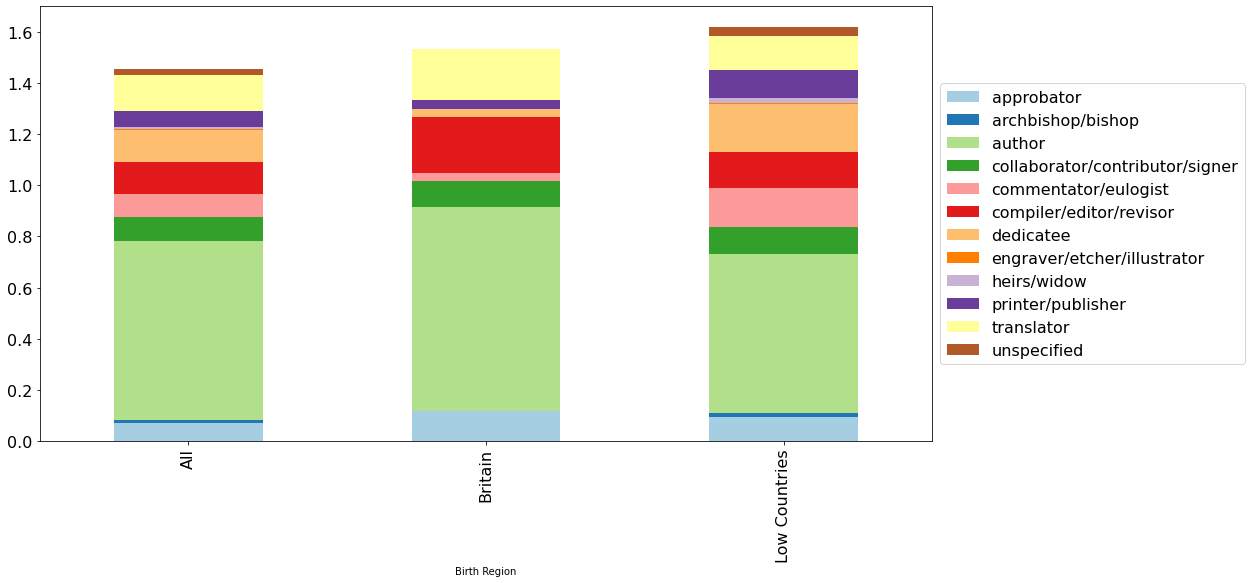

In [89]:
role_region_birth_pro_plot = role_region_birth_pro[['All', 'Britain', 'Low Countries']].T.plot.bar(stacked = True, figsize=(16, 8), colormap = 'Paired')
role_region_birth_pro_plot.tick_params(axis='x', labelsize = 16)
role_region_birth_pro_plot.tick_params(axis='y', labelsize = 16)
role_region_birth_pro_plot.legend(fontsize = 16, loc = 'center left', bbox_to_anchor = (1.0, 0.5))